In [ ]:
HOST = "192.168.0.0"
PORT = 6000


dac_A = 0
dac_B = 1

adc_A = 0
adc_B = 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qibosoq.client import execute
from qibosoq.components.base import (
    Qubit,
    OperationCode,
    Config,
    Sweeper,
    Parameter
)
from qibosoq.components.pulses import Rectangular, Measurement, Gaussian

## Single ADC measurements

All of these experiments must be executed both with averages and without.

- Single measurement
- Three consecutive measurements
- Readout pulse cycle on amplitude
- Readout pulse cycle on amplitude + additional readout pulse
- Sweep on amplitude (qubit spectroscopy)
- Raw pulse with different amplitudes

#### Single measurement

In [ ]:
pulse = Measurement(
    frequency = 5400, #MHz
    start_delay = 0,
    duration = 0.1,
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
config = Config(ro_time_of_flight=0, average=True)
qubit = Qubit()
sequence = [pulse]
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (1, 1)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")
else:
    print(f"Expected shape of {exptected}, got {np.shape(i)}")

Shape correct


Shape correct


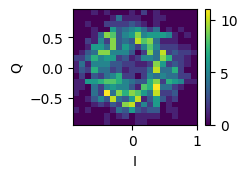

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
qubit = Qubit()
sequence = [pulse]
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (1, 1, 1000)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")

    bins = 20
    fig, ax1 = plt.subplots(1, 1, figsize=(2, 1.5))
    h1 = ax1.hist2d(i[0][0], q[0][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=ax1)
    ax1.set_xlabel('I')
    ax1.set_ylabel('Q')
    plt.show()
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")

#### Three consecutive measurements

In [ ]:
pulse1 = Measurement(
    frequency = 5400, #MHz
    start_delay = 0,
    duration = 0.1,
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
pulse2 = Measurement(
    frequency = 5400, #MHz
    start_delay = 0.11,
    duration = 0.1,
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
pulse3 = Measurement(
    frequency = 5400, #MHz
    start_delay = 0.11,
    duration = 0.1,
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
config = Config(ro_time_of_flight=0, average=True)
qubit = Qubit()
sequence = [pulse1, pulse2, pulse3]
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (1, 3)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")

Shape correct


Shape correct


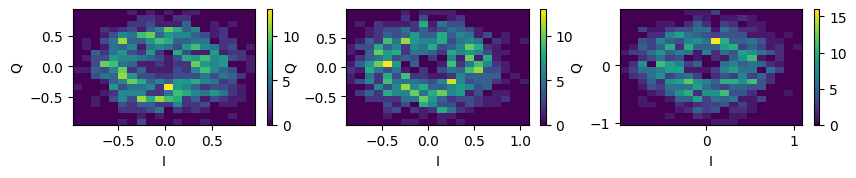

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
qubit = Qubit()
sequence = [pulse1, pulse2, pulse3]
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)
expected = (1, 3, 1000)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")

    bins = 20
    fig, axes = plt.subplots(1, 3, figsize=(10, 1.5))
    for idx in range(3):
        h1 = axes[idx].hist2d(i[0][idx], q[0][idx], bins = bins, cmap='viridis')
        fig.colorbar(h1[3], ax=axes[idx])
        axes[idx].set_xlabel('I')
        axes[idx].set_ylabel('Q')
    plt.show()
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")

#### Readout pulse cycle on amplitude

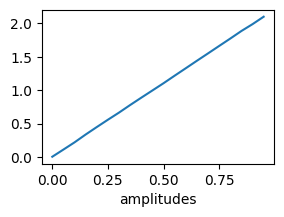

In [ ]:
pulse = Rectangular(
    frequency = 5400, #MHz
    amplitude = 1,
    relative_phase = 0,
    start_delay = 0,
    duration = 1,
    name = "readout_pulse",
    type = "readout",
    dac = dac_A,
    adc = adc_A
)

config = Config(ro_time_of_flight=0)
qubit = Qubit()

amplitudes = np.arange(0, 1, 0.05)
results = []
for amp in amplitudes:
    pulse.amplitude = amp
    sequence = [pulse]
    server_commands = {
        "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
        "cfg": config,
        "sequence": sequence,
        "qubits": [qubit],
    }
    
    i, q = execute(server_commands, HOST, PORT)
    assert np.shape(i) == np.shape(q) == (1, 1)
    results.append(i[0][0] + 1j*q[0][0])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(results))
ax.set_xlabel("amplitudes")
plt.show()

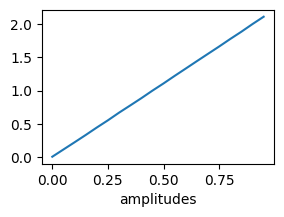

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
qubit = Qubit()

amplitudes = np.arange(0, 1, 0.05)
results = []
for amp in amplitudes:
    pulse.amplitude = amp
    sequence = [pulse]
    server_commands = {
        "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
        "cfg": config,
        "sequence": sequence,
        "qubits": [qubit],
    }
    
    i, q = execute(server_commands, HOST, PORT)
    assert np.shape(i) == np.shape(q) == (1, 1, 1000)
    i = np.mean(i, axis=-1)
    q = np.mean(q, axis=-1)
    results.append(i[0][0] + 1j*q[0][0])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(results))
ax.set_xlabel("amplitudes")
plt.show()

#### Readout pulse cycle on amplitude + additional readout pulse

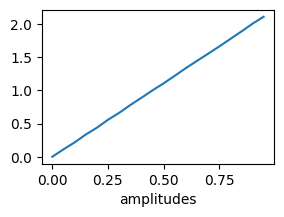

In [ ]:
pulse1 = Rectangular(
    frequency = 5400, #MHz
    amplitude = 1,
    relative_phase = 0,
    start_delay = 0,
    duration = 1,
    name = "readout_pulse",
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
pulse2 = Measurement(
    frequency = 5400, #MHz
    start_delay = 1,
    duration = 0.5,
    type = "readout",
    dac = dac_A,
    adc = adc_A
)


config = Config(ro_time_of_flight=0)
qubit = Qubit()

amplitudes = np.arange(0, 1, 0.05)
results = []
for amp in amplitudes:
    pulse1.amplitude = amp
    sequence = [pulse1, pulse2]
    server_commands = {
        "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
        "cfg": config,
        "sequence": sequence,
        "qubits": [qubit],
    }
    
    i, q = execute(server_commands, HOST, PORT)
    assert np.shape(i) == np.shape(q) == (1, 2)
    results.append(i[0][0] + 1j*q[0][0])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(results))
ax.set_xlabel("amplitudes")
plt.show()

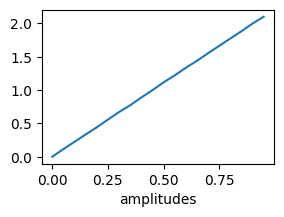

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
qubit = Qubit()

amplitudes = np.arange(0, 1, 0.05)
results = []
for amp in amplitudes:
    pulse1.amplitude = amp
    sequence = [pulse1, pulse2]
    server_commands = {
        "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
        "cfg": config,
        "sequence": sequence,
        "qubits": [qubit],
    }
    
    i, q = execute(server_commands, HOST, PORT)
    assert np.shape(i) == np.shape(q) == (1, 2, 1000)
    i = np.mean(i, axis=-1)
    q = np.mean(q, axis=-1)
    results.append(i[0][0] + 1j*q[0][0])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(results))
ax.set_xlabel("amplitudes")
plt.show()

#### Sweep on amplitude (qubit spectroscopy)

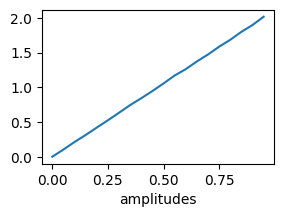

In [ ]:
pulse1 = Rectangular(
        frequency = 5400, #MHz
        amplitude = 0.05,
        relative_phase = 0,
        start_delay = 0,
        duration = 1,
        name = "drive_pulse",
        type = "drive",
        dac = dac_A,
        adc = adc_A
    )

pulse2 = Measurement(
    frequency = 5400, #MHz
    start_delay = 1,
    duration = 0.5,
    type = "readout",
    dac = dac_B,
    adc = adc_A
)

config = Config(ro_time_of_flight=0, average=True)
qubit = Qubit()

amplitudes = np.arange(0, 1, 0.05)
sweeper = Sweeper(
            parameters = [Parameter.AMPLITUDE],
            indexes = [0],
            starts = [amplitudes[0]],
            stops = [amplitudes[-1]],
            expts = len(amplitudes)  # number of points for the scan
)
results = []
sequence = [pulse1, pulse2]
server_commands = {
    "operation_code": OperationCode.EXECUTE_SWEEPS,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
    "sweepers": [sweeper]
}
i, q = execute(server_commands, HOST, PORT)
assert np.shape(i) == np.shape(q) == (1, 1, 20)
res = np.array(i[0][0]) + 1j * np.array(q[0][0])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(res))
ax.set_xlabel("amplitudes")
plt.show()

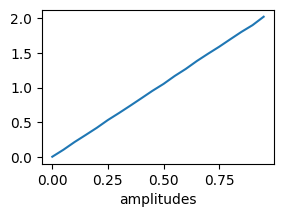

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
results = []
server_commands = {
    "operation_code": OperationCode.EXECUTE_SWEEPS,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
    "sweepers": [sweeper]
}
i, q = execute(server_commands, HOST, PORT)
assert np.shape(i) == np.shape(q) == (1, 1, 20, 1000)
i = np.mean(i, axis=-1)
q = np.mean(q, axis=-1)
res = i[0][0] + 1j * q[0][0]

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(amplitudes, np.abs(res))
ax.set_xlabel("amplitudes")
plt.show()

#### Raw pulse with different amplitudes

Shape i is (1, 1, 553) should be (1, 1, N)


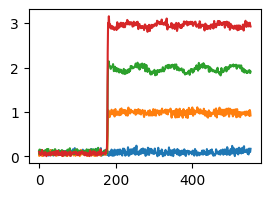

In [ ]:
pulse = Rectangular(
    frequency = 5400, #MHz
    amplitude = 0.05,
    relative_phase = 0,
    start_delay = 0,
    duration = 1,
    name = "readout_pulse",
    type = "readout",
    dac = dac_A,
    adc = adc_A
)
config = Config(ro_time_of_flight=0)

amplitudes = np.arange(0, 1, 0.3)
results = []
for amp in amplitudes:
    pulse.amplitude = amp
    sequence = [pulse]
    server_commands = {
        "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE_RAW,
        "cfg": config,
        "sequence": sequence,
        "qubits": [qubit],
    }
    
    i, q = execute(server_commands, HOST, PORT)
    results.append(np.array(i[0][0]) + 1j * np.array(q[0][0]))
print(f"Shape i is {np.shape(i)} should be (1, 1, N)")

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
for amp, res in zip(amplitudes, results):
    ax.plot(np.abs(res), label=amp)
plt.show()

## Two ADC measurements

All of these experiments must be executed both with averages and without.

- Two concurrent measurements (on two adcs)
- Three subsequent two-adcs measurements
- Asymmetric number of measurements between the two adcs
- Drive + measured by both adcs (check for "equal" results)

#### Two concurrent measurements)

In [ ]:
pulse1 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)

pulse2 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_B               # int
)
sequence = [pulse1, pulse2]

config = Config(ro_time_of_flight=100,average=True)
qubit = Qubit()

server_commands_sq = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE ,#_RAW,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}
i, q = execute(server_commands_sq, HOST, PORT)

expected = (2, 1)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")
else:
    print(f"Expected shape of {exptected}, got {np.shape(i)}")

Shape correct


Shape correct


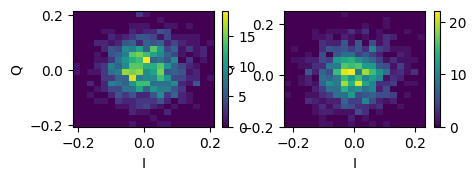

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (2, 1, 1000)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")

    bins = 20
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 1.5))
    h1 = ax1.hist2d(i[0][0], q[0][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=ax1)
    ax1.set_xlabel('I')
    ax1.set_ylabel('Q')
    h1 = ax2.hist2d(i[1][0], q[1][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=ax2)
    ax2.set_xlabel('I')
    ax2.set_ylabel('Q')

    plt.show()
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")

#### Three subsequent two-adcs measurements

In [ ]:
pulse1 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)
pulse2 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_B               # int
)
pulse3 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 1.5,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)
pulse4 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_B               # int
)
pulse5 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 1.5,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)
pulse6 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_B               # int
)
sequence = [pulse1, pulse2, pulse3, pulse4, pulse5, pulse6]

config = Config(ro_time_of_flight=100,average=True)
qubit = Qubit()

server_commands_sq = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE ,#_RAW,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}
i, q = execute(server_commands_sq, HOST, PORT)

expected = (2, 3)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")
else:
    print(f"Expected shape of {exptected}, got {np.shape(i)}")

Shape correct


Shape correct


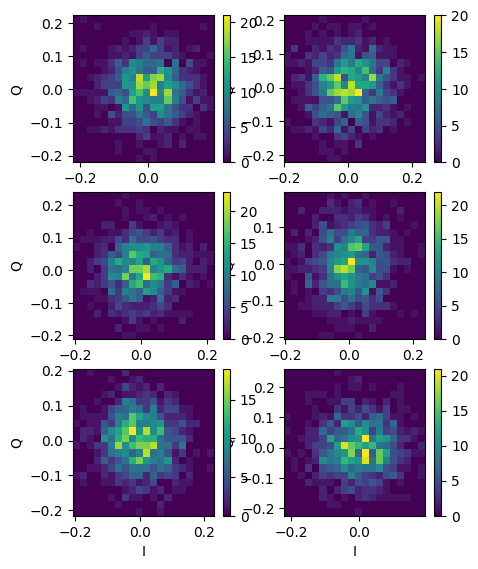

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (2, 3, 1000)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")

    bins = 20
    fig, axes = plt.subplots(3, 2, figsize=(5, 6.5))
    for idx in range(3):
        h1 = axes[idx][0].hist2d(i[0][idx], q[0][idx], bins = bins, cmap='viridis')
        fig.colorbar(h1[3], ax=axes[idx][0])
        axes[idx][0].set_xlabel('I')
        axes[idx][0].set_ylabel('Q')
        h1 = axes[idx][1].hist2d(i[1][idx], q[1][idx], bins = bins, cmap='viridis')
        fig.colorbar(h1[3], ax=axes[idx][1])
        axes[idx][1].set_xlabel('I')
        axes[idx][1].set_ylabel('Q')

    plt.show()
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")

#### Asymmetric number of measurements between the two adcs

In [ ]:
pulse1 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)
pulse2 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_B               # int
)
pulse3 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 1.5,    # float in us
     duration = 1,       # float in us
     dac = dac_A,              # int
     adc = adc_A               # int
)

sequence = [pulse1, pulse2, pulse3]

config = Config(ro_time_of_flight=100,average=True)
qubit = Qubit()

server_commands_sq = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE ,#_RAW,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}
i, q = execute(server_commands_sq, HOST, PORT)

adc_a_res = np.shape(i[0]) == np.shape(q[0]) == (2,)
adc_b_res = np.shape(i[1]) == np.shape(q[1]) == (1,)

if adc_a_res and adc_b_res:
    print("Shape correct")
else:
    print("Wrong shape")

Shape correct


Shape correct


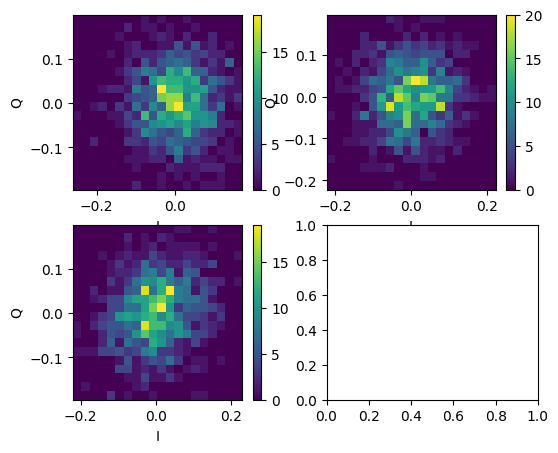

In [ ]:
config = Config(ro_time_of_flight=0, average=False)
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

adc_a_res = np.shape(i[0]) == np.shape(q[0]) == (2, 1000)
adc_b_res = np.shape(i[1]) == np.shape(q[1]) == (1, 1000)

if adc_a_res and adc_b_res:
    print("Shape correct")

    bins = 20
    fig, axes = plt.subplots(2, 2, figsize=(6, 5))

    h1 = axes[0][0].hist2d(i[0][0], q[0][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=axes[0][0])
    axes[0][0].set_xlabel('I')
    axes[0][0].set_ylabel('Q')
    
    h1 = axes[0][1].hist2d(i[0][1], q[0][1], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=axes[0][1])
    axes[0][1].set_xlabel('I')
    axes[0][1].set_ylabel('Q')

    h1 = axes[1][0].hist2d(i[1][0], q[0][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=axes[1][0])
    axes[1][0].set_xlabel('I')
    axes[1][0].set_ylabel('Q')
    
    plt.show()
else:
    print("Wrong shape")

### Drive + measurement

In [ ]:
pulse0 = Rectangular(
        type = "drive",
        name = "signal_pulse",
        frequency = 5400,    # float in MHz
        amplitude = 0.5,     # float in [-1, 1]
        relative_phase = 0,  # int in degrees
        start_delay = 0,    # float in us
        duration = 2,       # float in us
        dac = dac_B,             # int
        adc = adc_A              # int
)

pulse1 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 2,       # float in us
     dac = dac_B,              # int
     adc = adc_A               # int
)

pulse2 = Measurement(
     type = "readout",
     frequency = 5400,     # float in MHz
     start_delay = 0,    # float in us
     duration = 2,       # float in us
     dac = dac_B,              # int
     adc = adc_B               # int
)
sequence = [pulse0, pulse1, pulse2]

config = Config(ro_time_of_flight=130,average=True)
qubit = Qubit()

server_commands_sq = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE ,#_RAW,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}
i, q = execute(server_commands_sq, HOST, PORT)

expected = (2, 1)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")
else:
    print(f"Expected shape of {exptected}, got {np.shape(i)}")

Shape correct


Shape correct


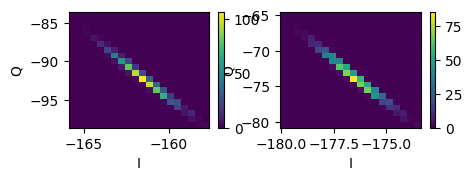

In [ ]:
config = Config(ro_time_of_flight=130, average=False)
server_commands = {
    "operation_code": OperationCode.EXECUTE_PULSE_SEQUENCE,
    "cfg": config,
    "sequence": sequence,
    "qubits": [qubit],
}

i, q = execute(server_commands, HOST, PORT)

expected = (2, 1, 1000)
if np.shape(i) == np.shape(q) == expected:
    print("Shape correct")

    bins = 20
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 1.5))
    h1 = ax1.hist2d(i[0][0], q[0][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=ax1)
    ax1.set_xlabel('I')
    ax1.set_ylabel('Q')
    h1 = ax2.hist2d(i[1][0], q[1][0], bins = bins, cmap='viridis')
    fig.colorbar(h1[3], ax=ax2)
    ax2.set_xlabel('I')
    ax2.set_ylabel('Q')

    plt.show()
else:
    print(f"Expected shape of {expected}, got {np.shape(i)}")